In [52]:
import pandas as pd
import numpy as np
from minisom import MiniSom as SOM
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib as mpl
mpl.use("Agg")
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')

# Análisis de expresión

Cargamos los datos

In [66]:
df = pd.read_csv("http://compbio.uthsc.edu/microarray/MeV/Data/Example_large.txt", sep="\t")
df.dropna(0, inplace=True)
df.to_csv("gene_expresssion_large_1.csv")
df.head()

,YORF,NAME,GWEIGHT,Ex1,Ex2,Ex3,Ex4,Ex5,Ex6,Ex7,Ex8,Ex9,Ex10
1,A0,A0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B0,B0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,C0,C0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
4,D0,D0,1.0,2.0,2.5,3.0,2.5,2.0,1.5,1.0,1.5,2.0,2.5
5,E0,E0,1.0,2.0,1.5,1.0,1.5,2.0,2.5,3.0,2.5,2.0,1.5


In [67]:
df = df[["NAME","Ex1", "Ex2", "Ex3", "Ex4", "Ex5", "Ex6", "Ex7", "Ex8", "Ex9", "Ex10"]]

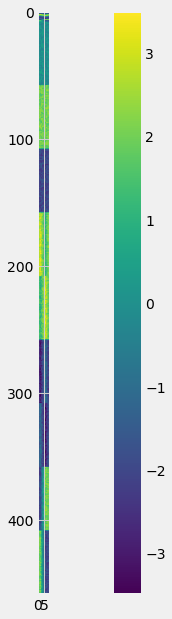

In [68]:
cols_exs = ["Ex1", "Ex2", "Ex3", "Ex4", "Ex5",  "Ex6", "Ex7", "Ex8", "Ex9", "Ex10"]

plt.imshow(df[cols_exs].values)
plt.colorbar()

In [69]:
genes = list(np.unique(df.NAME))
print(len(genes))
print(df.shape)


459
(459, 11)


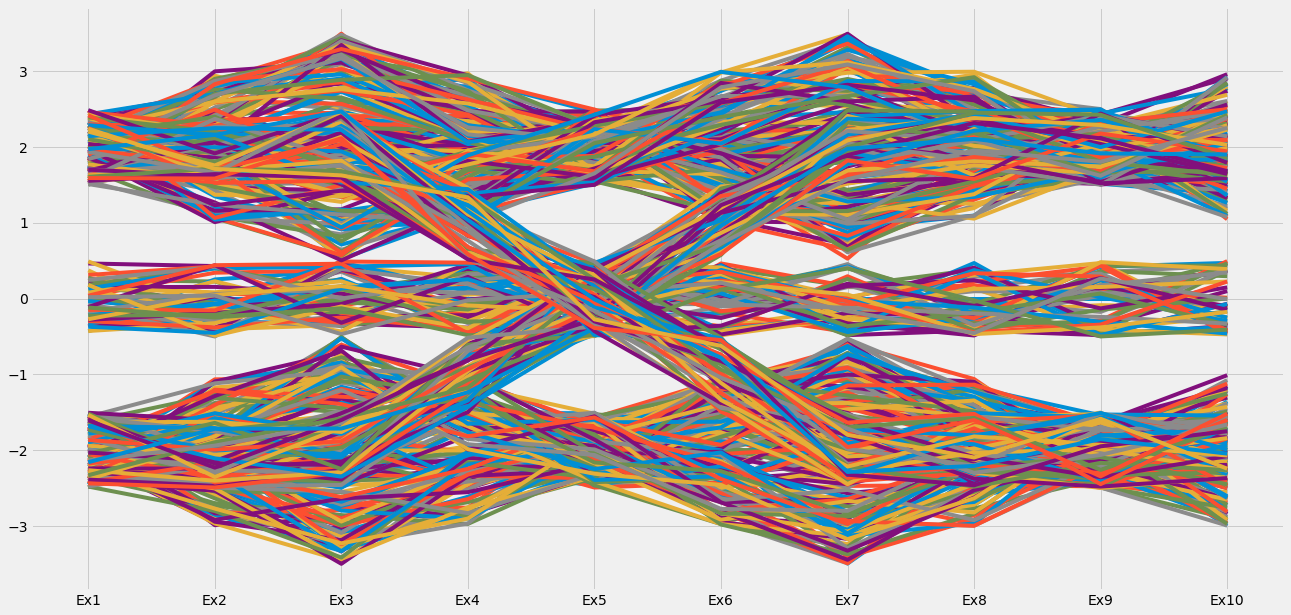

In [70]:
for i,r in df.iterrows():
    plt.plot(r[1:])

## PCA

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [74]:
V = pca.fit_transform(df[cols_exs])
V.shape

(459, 10)

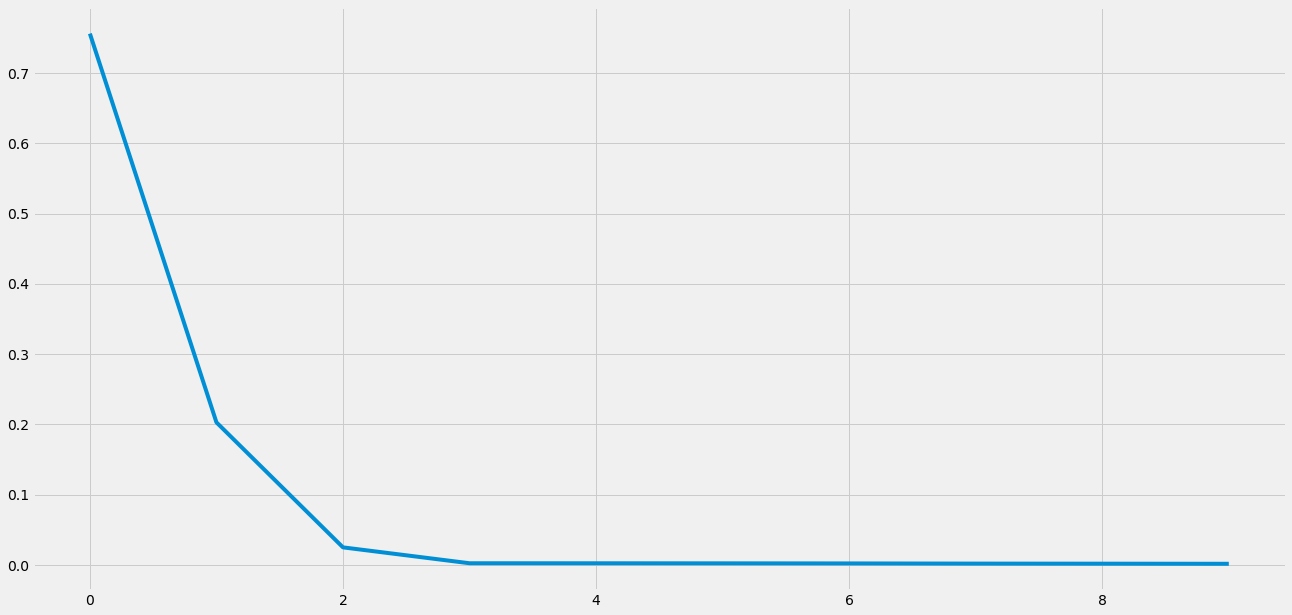

In [75]:
plt.plot(pca.explained_variance_ratio_)

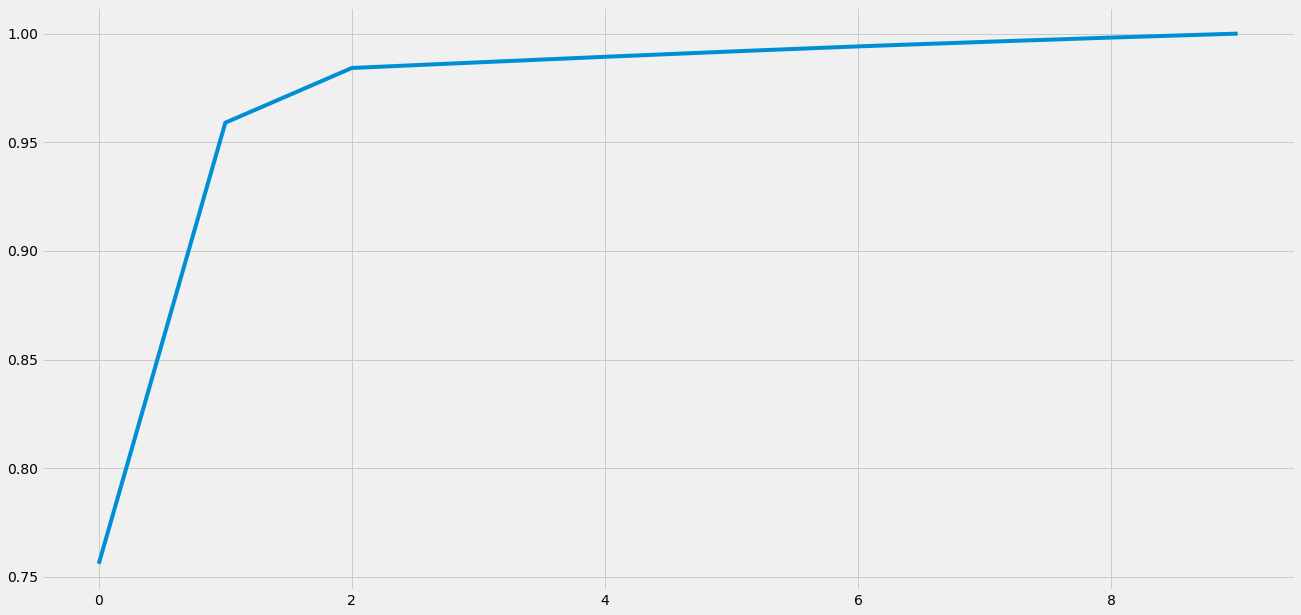

In [76]:
plt.plot(pca.explained_variance_ratio_.cumsum())

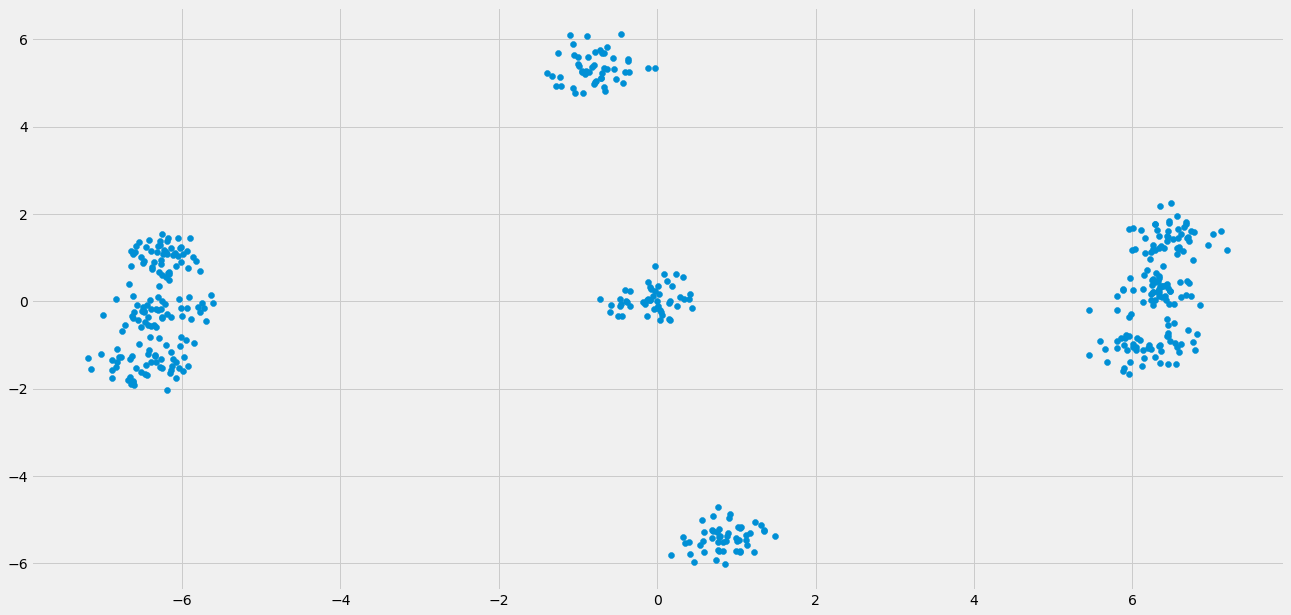

In [77]:
plt.scatter(V[:,0], V[:,1])

In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
for k in [3,4,5,6]:
    clf = KMeans(n_clusters=k, random_state=0).fit(V[:,0:2])
    lbs = clf.labels_
    scr = davies_bouldin_score(V[:,0:2], lbs)
    print("k: {} - > scr {}".format(k,scr))

k: 3 - > scr 0.7460816983208208
k: 4 - > scr 0.4982478452073091
k: 5 - > scr 0.1937637699530147
k: 6 - > scr 0.32721835503596325


In [79]:
clf = KMeans(n_clusters=5).fit(V[:,0:2])
lbs = clf.labels_
print(lbs)

[3 1 0 1 1 0 0 4 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


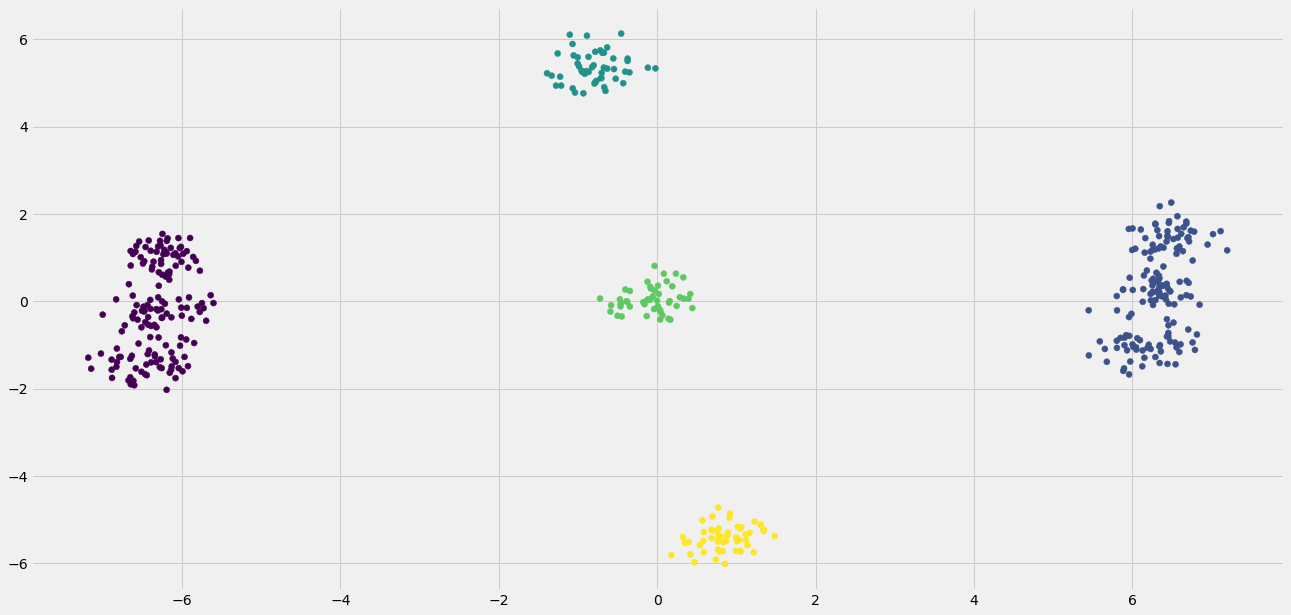

In [80]:
plt.scatter(V[:,0], V[:,1], c=lbs)

3


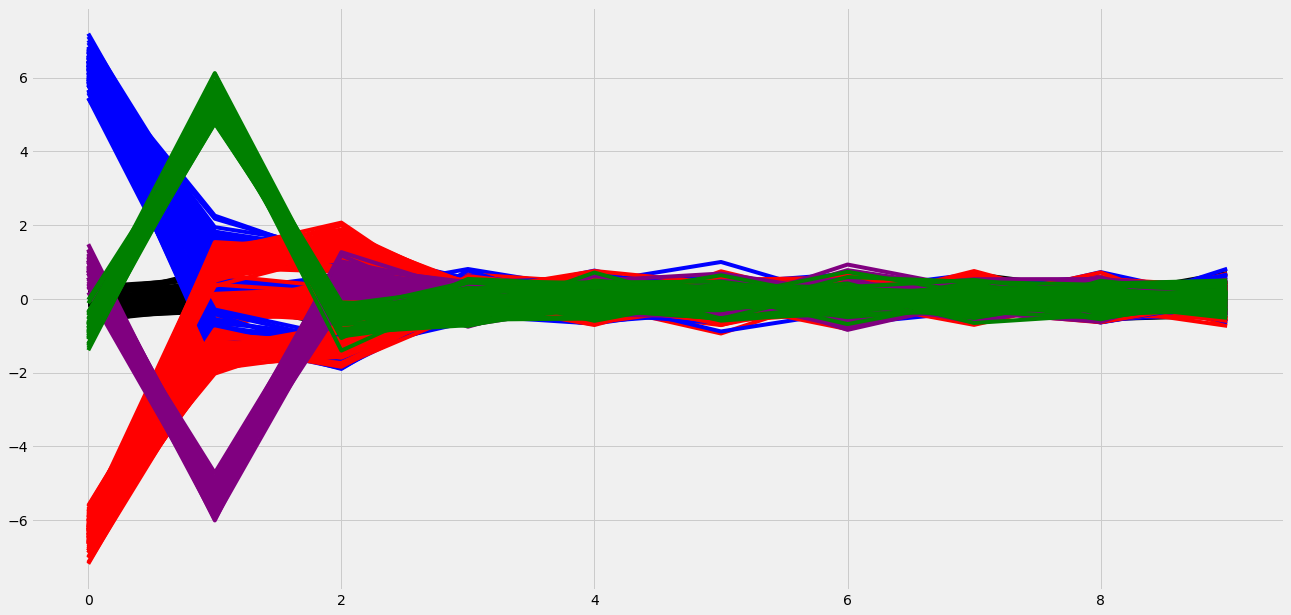

In [81]:
lc = {0:'red', 1:'blue', 2:'green', 3:'black', 4:'purple'}
print(lbs[0])
for i,v in enumerate(V):
    plt.plot(v, color=lc[lbs[i]])


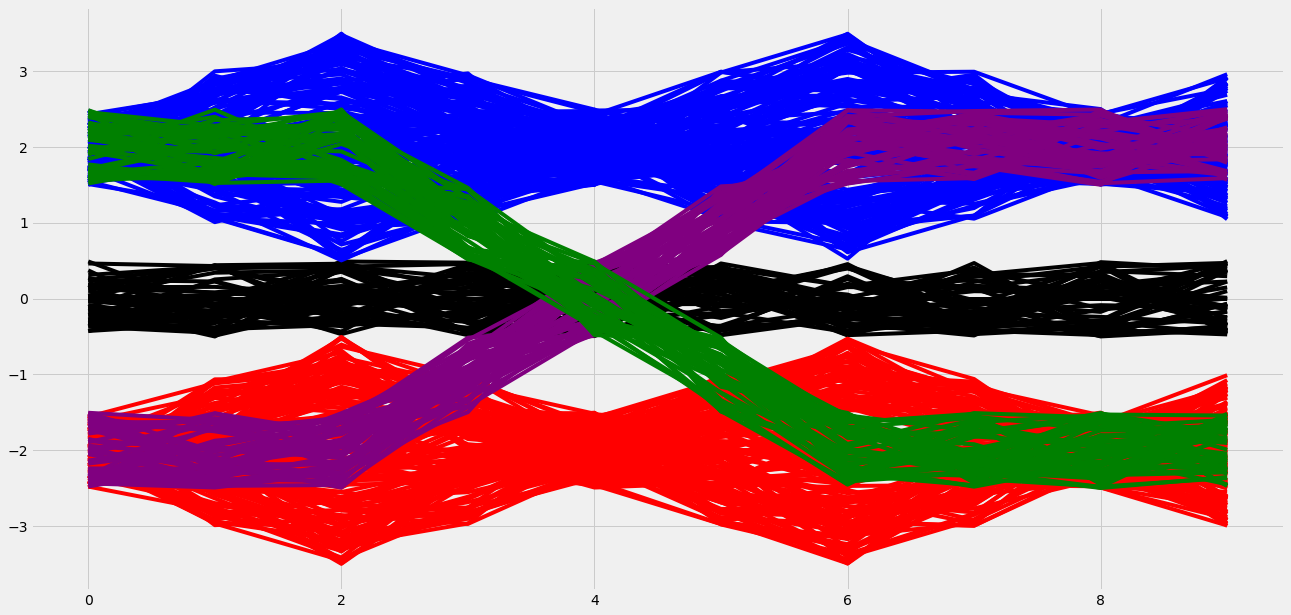

In [82]:

for r,c in zip(df.iterrows(),lbs):
    i, row = r
    plt.plot(np.array(row[1:]), color=lc[lbs[i-1]])


## SOM

In [83]:
#tam de la malla
n = df.shape[0]
M = int(5*np.power(n,0.5))
print(u"Número de unidades {}".format(M))
(r,c) = 12,9
print(u"Filas {}".format(r))
print(u"Columnas {}".format(c))
sigmas = [4,5,6]
constantes = [0.1, 0.2, 1]
dim_som = (r,c)
datos = MinMaxScaler().fit_transform(df[cols_exs].values)
print(datos[0])
k = len(datos[0])

Número de unidades 107
Filas 12
Columnas 9
[0.50042563 0.4991666  0.5001206  0.50003387 0.49973319 0.49875396
 0.50003572 0.5002771  0.4997361  0.50300331]


In [84]:
errores = []
for s in sigmas:
    for c in constantes:
        som = SOM(dim_som[0], dim_som[1], k, sigma=s, learning_rate=c)
        som.pca_weights_init(datos)
        som.train_batch(datos,100)
        q = som.quantization_error(datos)
        errores.append( (s,c, q) )
        print( "s: {}  c: {} -> q: {}".format(s,c,q))

s: 4  c: 0.1 -> q: 0.4664851350861128
s: 4  c: 0.2 -> q: 0.46135136917409497
s: 4  c: 1 -> q: 0.6901289442786959
s: 5  c: 0.1 -> q: 0.4863244061483305
s: 5  c: 0.2 -> q: 0.5814426581193824
s: 5  c: 1 -> q: 0.7997750017696097
s: 6  c: 0.1 -> q: 0.5228859850889624
s: 6  c: 0.2 -> q: 0.6500489661845037
s: 6  c: 1 -> q: 1.0615518439983893


In [85]:
mejor = sorted(errores, key=lambda x: x[2])[0]
print("Sigma {}, ca {}".format(mejor[0], mejor[1]))

Sigma 4, ca 0.2


In [89]:
som = SOM(dim_som[0], dim_som[1], k, sigma=mejor[0], learning_rate=mejor[1], topology='hexagonal')
som.train_batch(datos,100, verbose=True)


 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.6098799688887034


In [90]:
matrix = 1 - som.distance_map().T
matrix

array([[0.60246349, 0.4740076 , 0.48744501, 0.39330038, 0.32205223,
        0.33708603, 0.41373655, 0.53134773, 0.5971668 , 0.54022346,
        0.43193039, 0.51280786],
       [0.34799219, 0.28700426, 0.17519631, 0.04014956, 0.        ,
        0.09053268, 0.2406014 , 0.38375746, 0.38527179, 0.25578862,
        0.10424127, 0.51251971],
       [0.66786012, 0.33399928, 0.20263837, 0.08143586, 0.07643274,
        0.25082446, 0.45210794, 0.61508964, 0.68056243, 0.62015848,
        0.46813992, 0.45402843],
       [0.50089218, 0.2370602 , 0.0706985 , 0.05551247, 0.25580315,
        0.5268486 , 0.74018171, 0.85880794, 0.85980878, 0.74614341,
        0.54639921, 0.74957904],
       [0.68544716, 0.3156605 , 0.12455993, 0.0227204 , 0.13148842,
        0.42936917, 0.71324845, 0.87946767, 0.91991879, 0.87973271,
        0.72298414, 0.62870408],
       [0.49828329, 0.2699572 , 0.0862067 , 0.06147599, 0.26510757,
        0.53010895, 0.74056463, 0.85752674, 0.85761687, 0.74680553,
        0.55097164,

<Figure size 1440x720 with 0 Axes>

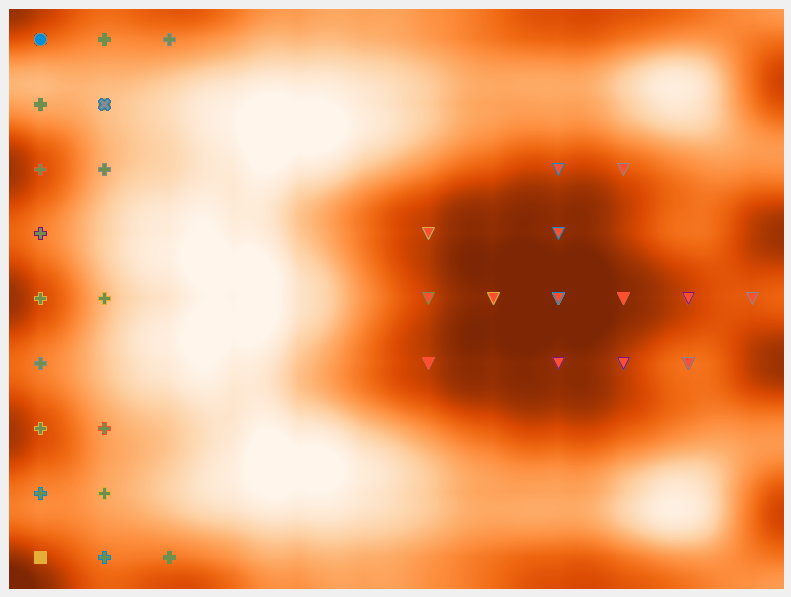

In [91]:


plt.clf()
fig, axn = plt.subplots(1,1)

marcadores = ['o','v','s','P','X']
colores =    ['C0','C1','C2','C3','C4']


plt.imshow(matrix, interpolation='sinc', cmap='Oranges')
plt.xticks([])
plt.yticks([])

for ix,d in enumerate(datos):
    w = som.winner(d)
    plt.plot(w[0], w[1], 
             marcadores[lbs[ix]],markerfacecolor=colores[lbs[ix]], markersize=12)
    